# Highlighting the differences between HUNT3 and HUNT4

In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import random

hunt_path = '/cluster/projects/vc/data/mic/closed/MRI_HUNT/images/images_3D_preprocessed/'
hunts = ['HUNT3', 'HUNT4']

Select random candidate

In [17]:
entry = os.listdir(os.path.join(hunt_path, hunts[0]))[random.randint(0, len(os.listdir(os.path.join(hunt_path, hunts[0]))) - 1)]
print("Entry to open:", entry)

if os.path.exists(os.path.join(hunt_path, hunts[1], entry)):
    print(f"{entry} exists in both HUNT3 and HUNT4")
else:
    print(f"{entry} does not exist in HUNT4")
    exit()

Entry to open: 14838
14838 exists in both HUNT3 and HUNT4


Load both NIfTI files

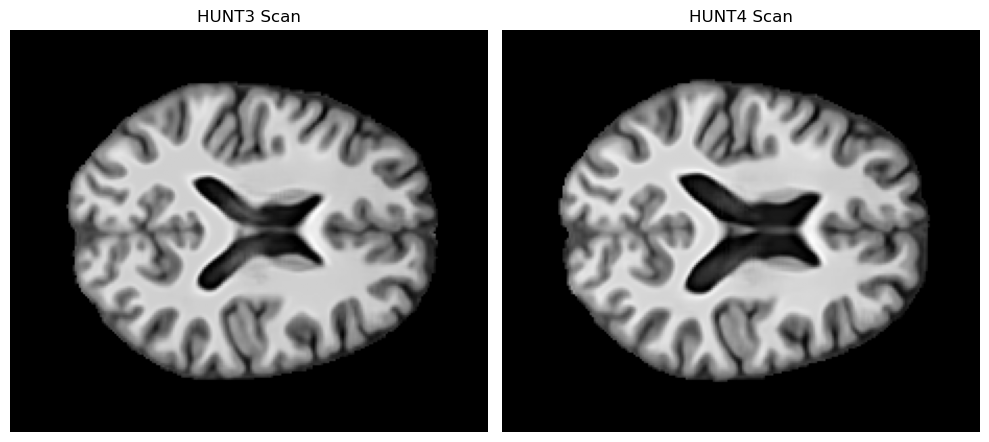

In [19]:
hunt3_img = nib.load(os.path.join(hunt_path, hunts[0], entry, entry+'_0_T1_PREP_MNI.nii.gz'))
hunt3_data = hunt3_img.get_fdata()

hunt4_img = nib.load(os.path.join(hunt_path, hunts[1], entry, entry+'_1_T1_PREP_MNI.nii.gz'))
hunt4_data = hunt4_img.get_fdata()

# Create figure with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Show HUNT3 image
axs[0].imshow(hunt3_data[:, :, hunt3_data.shape[2] // 2], cmap='gray')
axs[0].set_title('HUNT3 Scan')
axs[0].axis('off')

if hunt4_entry:
    # Show HUNT4 image
    axs[1].imshow(hunt4_data[:, :, hunt4_data.shape[2] // 2], cmap='gray')
    axs[1].set_title('HUNT4 Scan')
    axs[1].axis('off')
else:
    # Hide the second subplot if no HUNT4 entry exists
    axs[1].axis('off')

plt.tight_layout()
plt.show()

## Differences

### Highlighting the differences

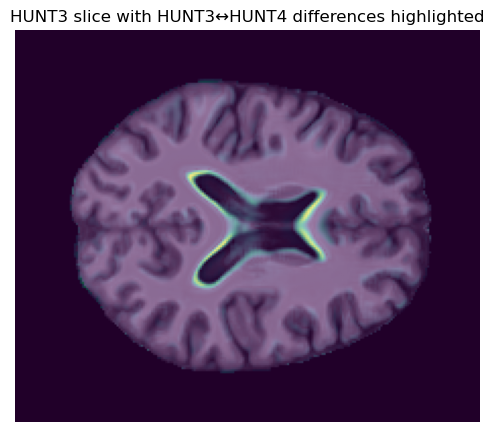

In [20]:
# Pick a slice (middle axial)
k = hunt3_data.shape[2] // 2

# Simple absolute difference
diff_slice = np.abs(hunt3_data[:, :, k] - hunt4_data[:, :, k])



mask = diff_slice

plt.figure(figsize=(6, 6))
plt.imshow(hunt3_data[:, :, k], cmap='gray')
plt.imshow(mask, alpha=0.5)  # default colormap overlays in color
plt.title('HUNT3 slice with HUNT3↔HUNT4 differences highlighted')
plt.axis('off')
plt.show()

### Displaying only the differences

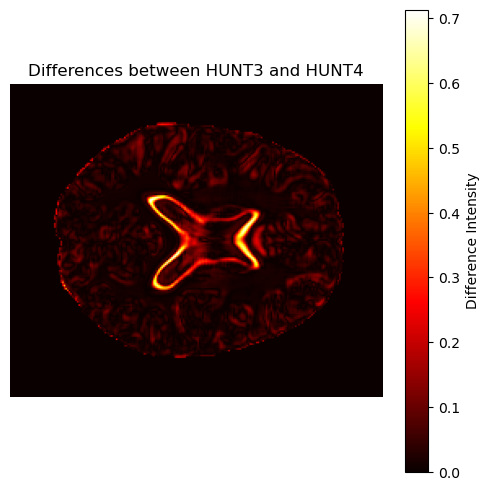

In [21]:
# Display only the differences
plt.figure(figsize=(6, 6))
plt.imshow(diff_slice, cmap='hot')  # 'hot' colormap for differences
plt.title('Differences between HUNT3 and HUNT4')
plt.axis('off')
plt.colorbar(label='Difference Intensity')
plt.show()